In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Only the 'diagnosis' column, which we have to predict is of object datatype.

There's only ID column of int type. We will probably drop it anyway.

In [19]:
df.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

replace
M:1 B:0

In [20]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0], dtype=int64)

In order to conduct our analysis easily, we have converted the target column as:

Malignant - 1(infected)
Benignant - 0(not infected)

Text(0.5, 1.0, 'Correlation Map')

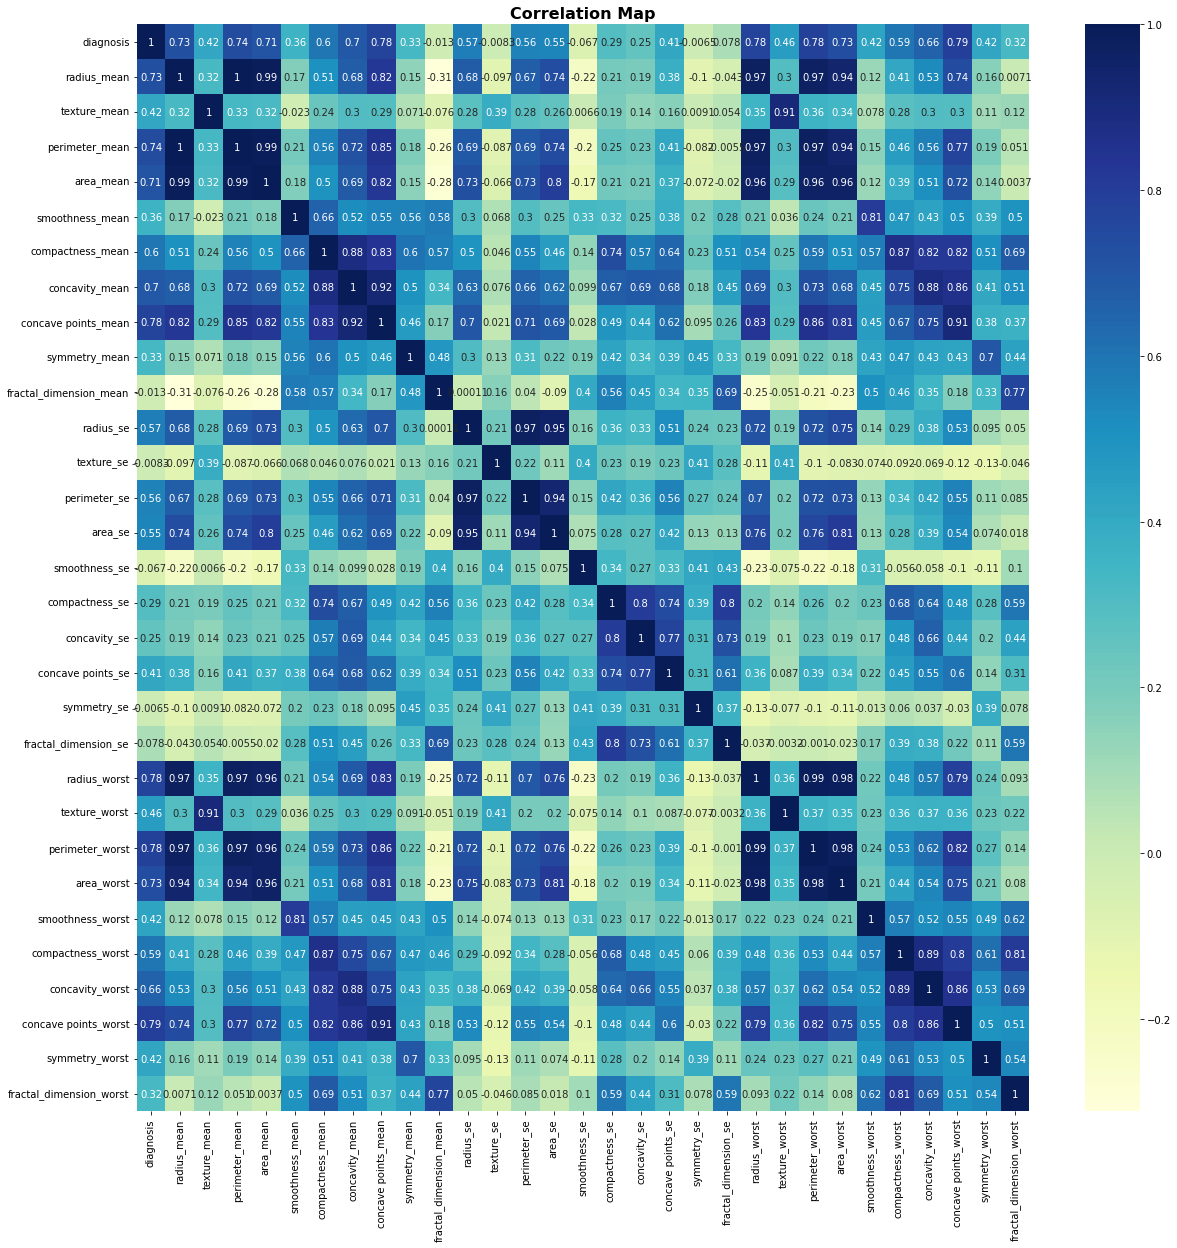

In [21]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [22]:
#: The following columns are the one's that show the greatest correlation with our diagnosis column.
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

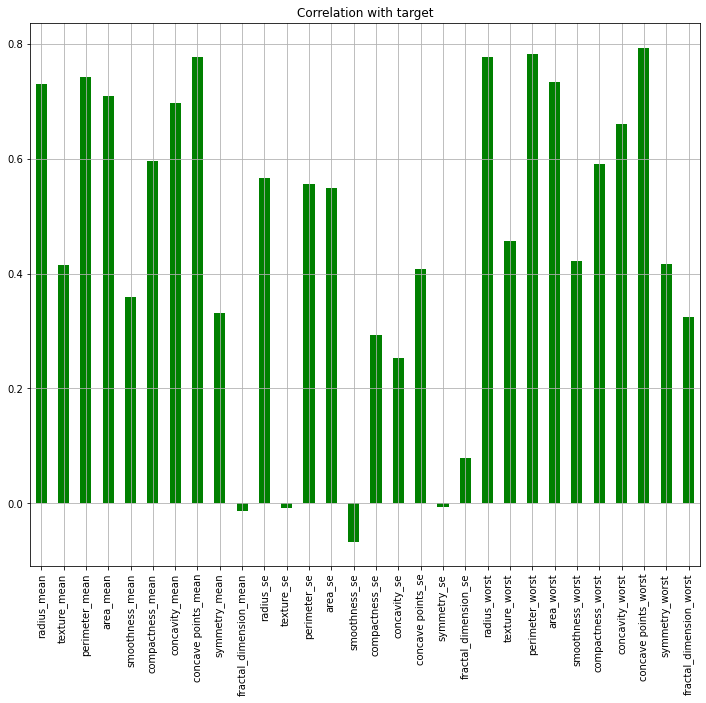

In [23]:
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

In [31]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [32]:
#dividing data
X = df[["radius_mean","texture_mean","perimeter_mean","area_mean","concavity_mean","concave points_mean","fractal_dimension_mean"]]
y = df.diagnosis

In [37]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.30010,0.14710,0.07871
1,20.57,17.77,132.90,1326.0,0.08690,0.07017,0.05667
2,19.69,21.25,130.00,1203.0,0.19740,0.12790,0.05999
3,11.42,20.38,77.58,386.1,0.24140,0.10520,0.09744
4,20.29,14.34,135.10,1297.0,0.19800,0.10430,0.05883
...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.24390,0.13890,0.05623
565,20.13,28.25,131.20,1261.0,0.14400,0.09791,0.05533
566,16.60,28.08,108.30,858.1,0.09251,0.05302,0.05648
567,20.60,29.33,140.10,1265.0,0.35140,0.15200,0.07016


In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [46]:
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [47]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_model=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_model))

Accuracy: 0.9532163742690059


In [51]:
to_predict_list=[7.66,24.54,47.92,181,0,0,0.05884]
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(to_predict_list)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
prediction[0]

C:\Users\SAMUEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [53]:
import pickle
pickle.dump(model, open('cancer.pkl', 'wb'))